<h2>1 - Packages</h2>

In [48]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
from testCases_v2 import *
from public_tests import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2>2 - Load the Dataset</h2>

In [49]:
X, Y = load_planar_dataset()

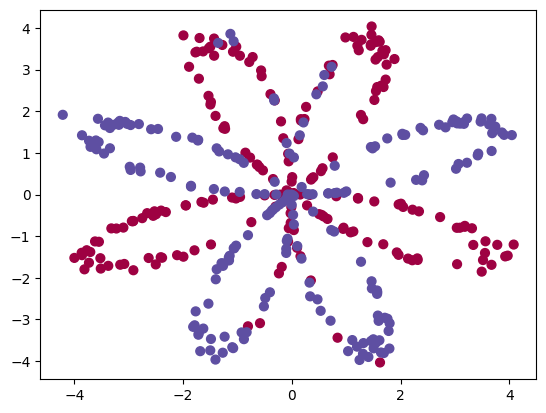

In [50]:
# visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [51]:
# get the shapes of X and Y
shape_X = X.shape
shape_Y = Y.shape
# training set size
m = X.shape[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


<h2>3 - Simple Logistic Regression</h2>

In [52]:
# train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T)

C:\Users\nabin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

C:\Users\nabin\AppData\Local\Temp\ipykernel_3052\4242423965.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


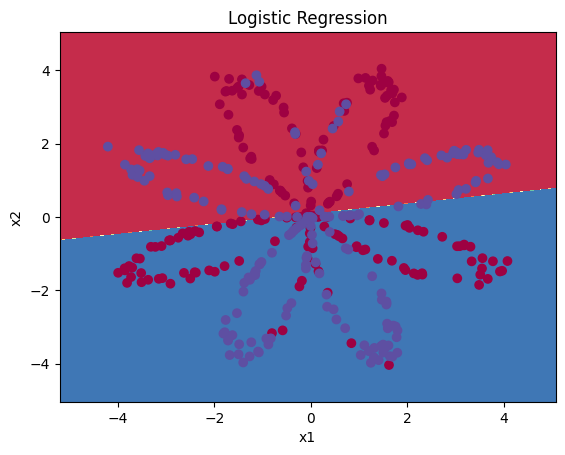

In [53]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

<h2>4 - Neural Network Model</h2>

<h3>Defining the neural network structure</h3>

In [54]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [55]:
t_X, t_Y = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(t_X, t_Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

layer_sizes_test(layer_sizes)

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2
All tests passed!


<h3>Initialize the model's parameters</h3>

In [56]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1":W1,
                 "W2":W2,
                 "b1":b1,
                 "b2":b2}
    return parameters

In [57]:
np.random.seed(2)
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

initialize_parameters_test(initialize_parameters)

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]
All tests passed!


<h3>Forward propagation</h3>

In [58]:
def forward_propagation(X, parameters):
    #retrieve parameters from the dictionary
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    #Implement forward propagation to calculate A2
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [59]:
t_X, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(t_X, parameters)
print("A2 = " + str(A2))

forward_propagation_test(forward_propagation)

A2 = [[0.21292656 0.21274673 0.21295976]]
All tests passed!


<h3>compute the cost</h3>

In [60]:
def compute_cost(A2, Y):
    m = Y.shape[1] #no of examples

    #compute the cross entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1-A2))
    cost = -1/m*np.sum(logprobs)

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

In [61]:
A2, t_Y = compute_cost_test_case()
cost = compute_cost(A2, t_Y)
print("cost = " + str(compute_cost(A2, t_Y)))

compute_cost_test(compute_cost)

cost = 0.6930587610394646
All tests passed!


<h3>Implement Backpropagation</h3>

In [62]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    #first, retrieve W1, W2 from parameters
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    #retrieve A1 and A2 from dictionary cache
    A1 = cache["A1"]
    A2 = cache["A2"]

    #Backward propagation: calculate dw1, db1, dw2, db2
    dZ2 = A2 - Y
    dW2 = 1/m*np.dot(dZ2, A1.T)
    db2 = 1/m*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1-np.power(A1,2))
    dW1 = 1/m*np.dot(dZ1, X.T)
    db1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [63]:
parameters, cache, t_X, t_Y = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, t_X, t_Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

backward_propagation_test(backward_propagation)

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]
All tests passed!


<h3>Update parameters</h3>

In [64]:
def update_parameters(parameters, grads, learning_rate=1.2):
    #retrieve a copy of each parameter from the dictionary parameters. Use copy.deepcopy for W1 and W2
    W1 = copy.deepcopy(parameters["W1"])
    b1 = parameters["b1"]
    W2 = copy.deepcopy(parameters["W2"])
    b2 = parameters["b2"]

    #retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    #Update rule for each parameter
    W1 = W1  - learning_rate * dW1
    b1 = b1  - learning_rate * db1
    W2 = W2  - learning_rate * dW2
    b2 = b2  - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [65]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

update_parameters_test(update_parameters)

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]
All tests passed!


<h3>Integration</h3>

integrate your functions in nn_model()

In [66]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)
    #loop - gradient descent
    for i in range(0, num_iterations):
        #forward propagation. Inputs: X, parameters. Outputs: A2, cache
        A2, cache = forward_propagation(X, parameters)

        # cost function
        cost = compute_cost(A2, Y)

        # Backpropagation
        grads = backward_propagation(parameters, cache, X, Y)

        # gradient descent parameter update
        parameters = update_parameters(parameters, grads)

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [67]:
nn_model_test(nn_model)

Cost after iteration 0: 0.693086
Cost after iteration 1000: 0.000220
Cost after iteration 2000: 0.000108
Cost after iteration 3000: 0.000072
Cost after iteration 4000: 0.000054
Cost after iteration 5000: 0.000043
Cost after iteration 6000: 0.000036
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000027
Cost after iteration 9000: 0.000024
W1 = [[ 0.71392202  1.31281102]
 [-0.76411243 -1.41967065]
 [-0.75040545 -1.38857337]
 [ 0.56495575  1.04857776]]
b1 = [[-0.0073536 ]
 [ 0.01534663]
 [ 0.01262938]
 [ 0.00218135]]
W2 = [[ 2.82545815 -3.3063945  -3.16116615  1.8549574 ]]
b2 = [[0.00393452]]
All tests passed!


<h3>5 - Test the model</h3>

In [68]:
def predict(parameters, X):
    #compute probabilities using forward propagation, and classify to 0/1 using 0.5 as the threshold
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>0.5).astype(int)
    
    return predictions

In [69]:
parameters, t_X = predict_test_case()

predictions = predict(parameters, t_X)
print("Predictions: " + str(predictions))

predict_test(predict)

Predictions: [[1 0 1]]
All tests passed!


<h3>Test the model on the planar dataset</h3>

Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220602
Cost after iteration 8000: 0.219408
Cost after iteration 9000: 0.218525


Text(0.5, 1.0, 'Decision boundary for hidden layer size4')

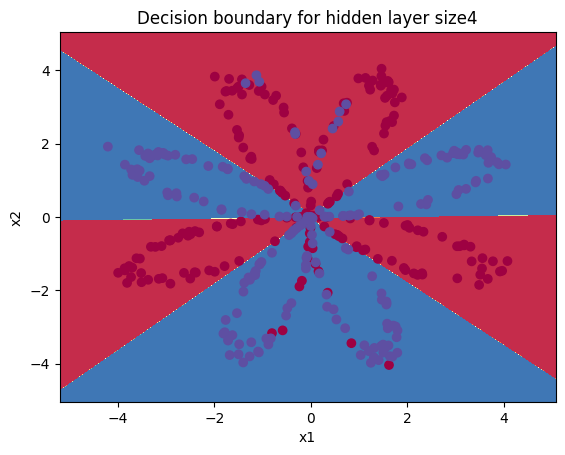

In [70]:
parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost = True)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision boundary for hidden layer size" + str(4))

In [71]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


C:\Users\nabin\AppData\Local\Temp\ipykernel_3052\1304927518.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')


<h3>Tuning the hidden layer size</h3>

C:\Users\nabin\AppData\Local\Temp\ipykernel_3052\801090216.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %


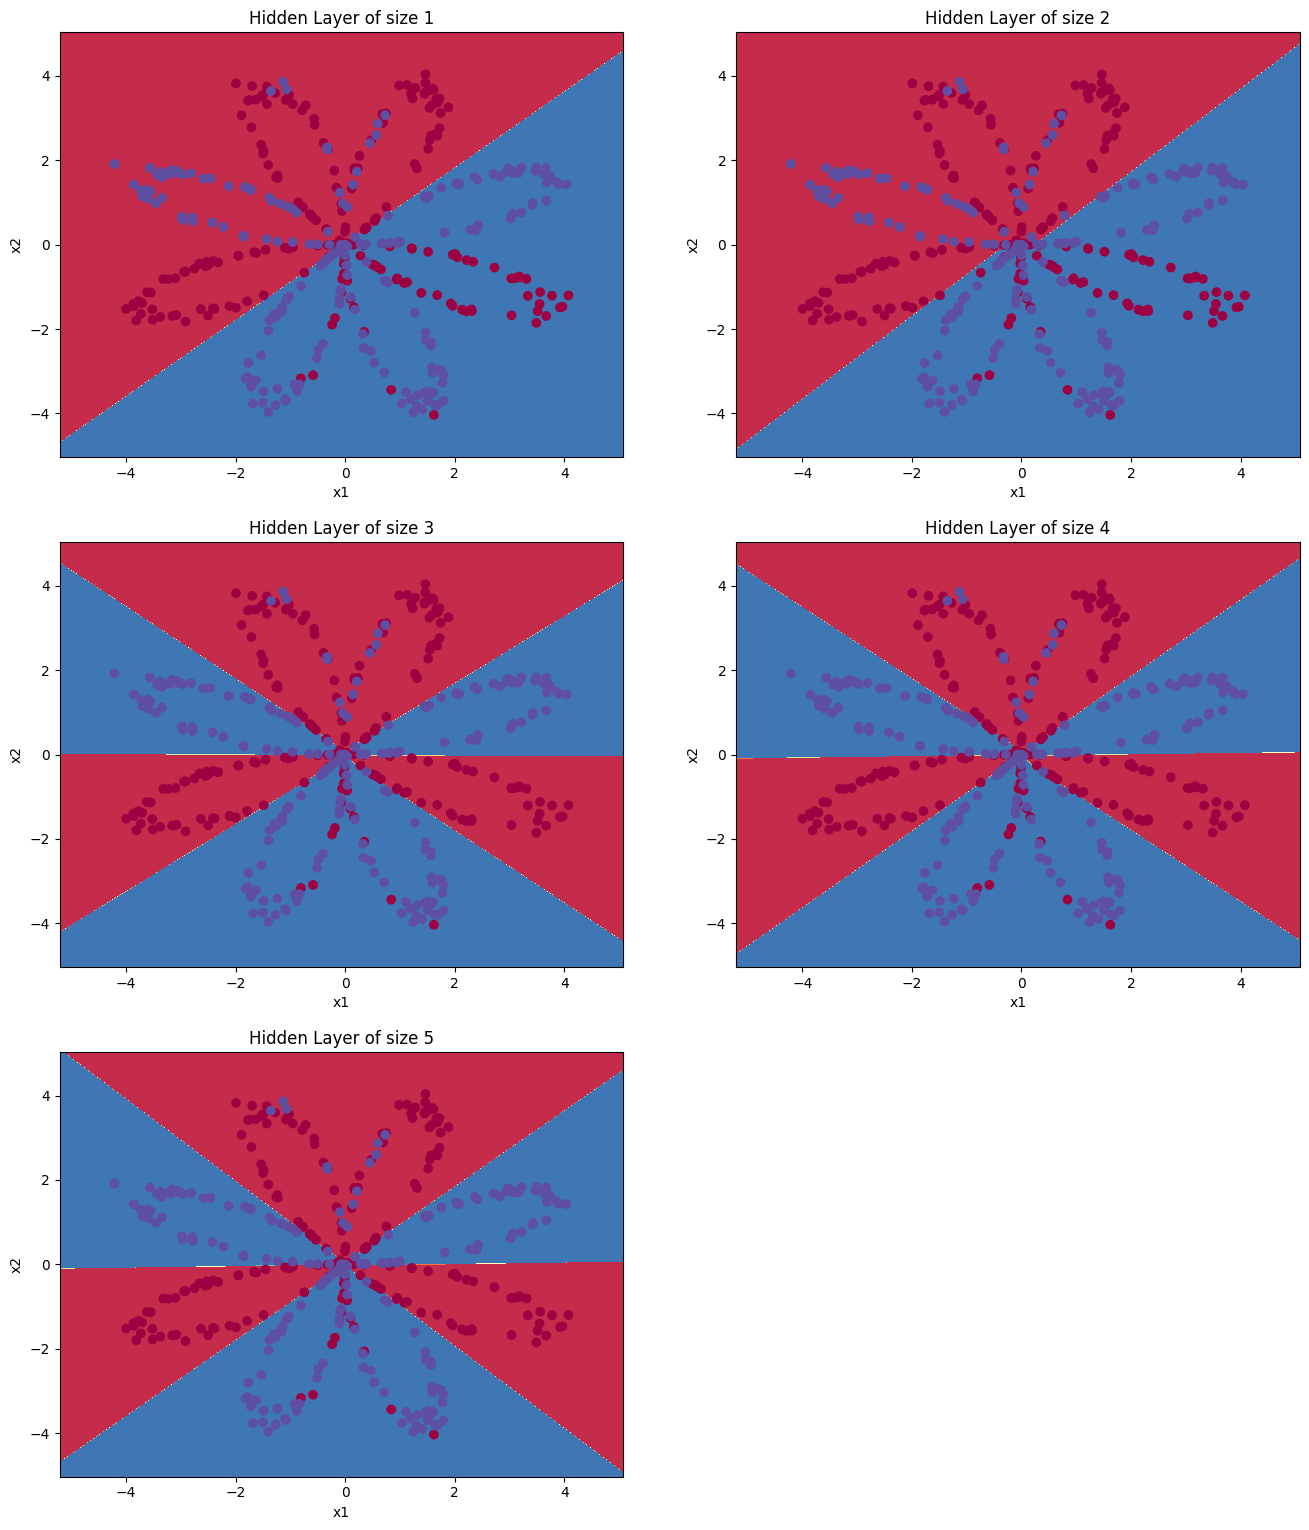

In [72]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5]

# you can try with different hidden layer sizes
# but make sure before you submit the assignment it is set as "hidden_layer_sizes = [1, 2, 3, 4, 5]"
# hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))